# **Библиотеки**

In [1]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LeakyReLU, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# **Анализ данных**

In [2]:
# Загрузка данных (
train = pd.read_csv('/content/Task5_train.csv')
test = pd.read_csv('/content/Task5_test.csv')

In [ ]:
# Просмотр данных
print(train.head())
print(train.info())
print(train.describe())

          Y        X1         X2         X3         X4        X5        X6  \
0  0.146442 -3.375223 -10.380706  14.488187  42.433324  3.567948 -0.407952   
1  0.488790 -3.071530 -22.425550   4.060582  19.652617 -7.134599 -7.201065   
2  0.209077  2.512906  11.003405  13.591295  -6.510962 -1.534895 -3.742965   
3  0.621051  0.485973 -15.891477  34.422507  -3.772496 -3.618411  3.278072   
4  0.875695 -8.140371   6.173805   6.635861   4.463215 -0.964935  5.543937   

         X7         X8         X9  ...       X111      X112       X113  \
0 -0.778009  -6.806665   0.304032  ...  17.842198 -4.235979  -3.090988   
1 -0.175808  33.717211  -2.658686  ...  10.305863 -0.077751 -16.040180   
2  0.455756  30.643341  -0.766931  ...   2.116266 -6.212255 -30.838870   
3 -0.229292 -11.056757  40.921275  ...  13.309494 -6.547626 -26.224855   
4  0.862716 -11.539494  21.111441  ...  12.194029 -4.621176 -11.836028   

        X114       X115       X116       X117       X118       X119       X120  
0 -16

In [ ]:
# Проверка пропусков
data.isnull().sum()

,0
Y,0
X1,0
X2,0
X3,0
X4,0
...,...
X116,0
X117,0
X118,0
X119,0


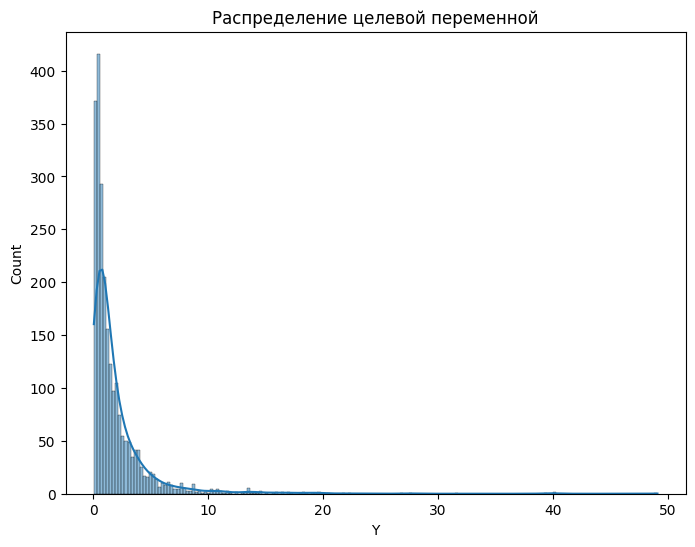

In [ ]:
# Распределение целевой переменной Y
plt.figure(figsize=(8, 6))
sns.histplot(train['Y'], kde=True)
plt.title("Распределение целевой переменной")
plt.show()

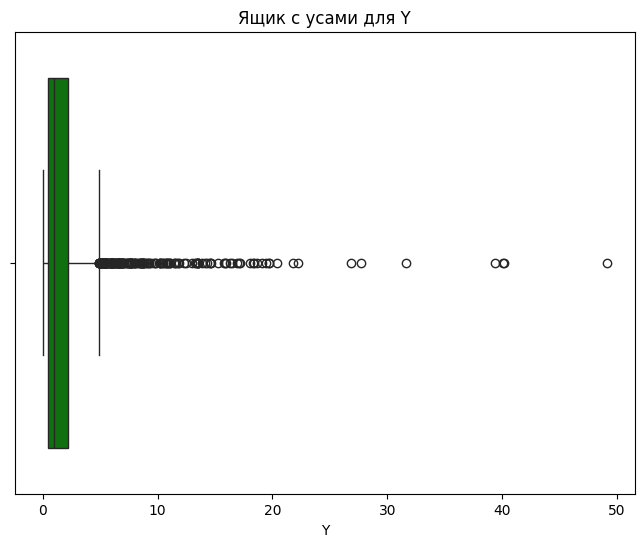

In [ ]:
# Boxplot для поиска выбросов
plt.figure(figsize=(8, 6))
sns.boxplot(x=train['Y'], color='green')
plt.title('Ящик с усами для Y')
plt.xlabel('Y')
plt.show()

Корреляция Y с признаками:
 Y       1.000000
X113    0.457529
X54     0.415081
X21     0.380102
X77     0.346491
          ...   
X96    -0.274195
X59    -0.297336
X64    -0.300430
X107   -0.368785
X55    -0.392494
Name: Y, Length: 121, dtype: float64


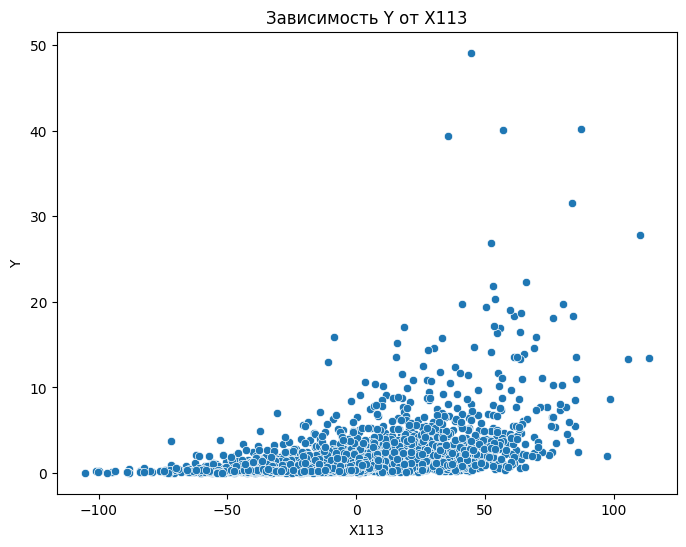

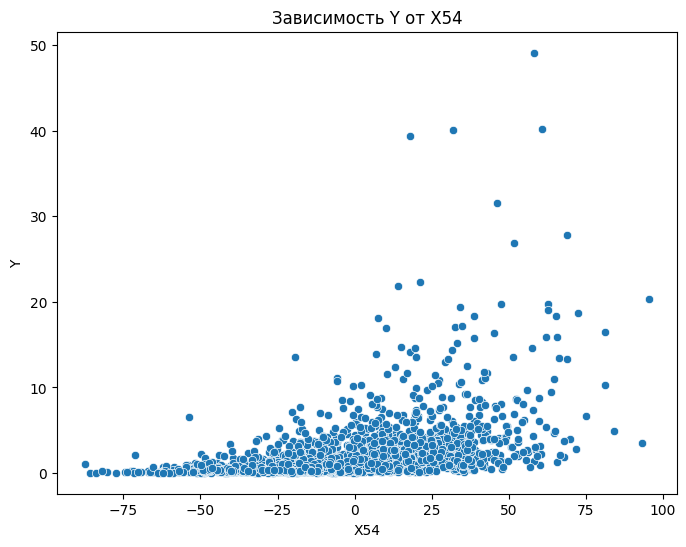

In [ ]:
# Корреляция Y с признаками
correlations = train.corr()['Y'].sort_values(ascending=False)
print("Корреляция Y с признаками:\n", correlations)

# Визуализация линейной зависимости (например, с топ-2 признаками)
top_features = correlations.index[1:3]  # Первое - это Y
for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=train[feature], y=train['Y'])
    plt.title(f'Зависимость Y от {feature}')
    plt.xlabel(feature)
    plt.ylabel('Y')
    plt.show()

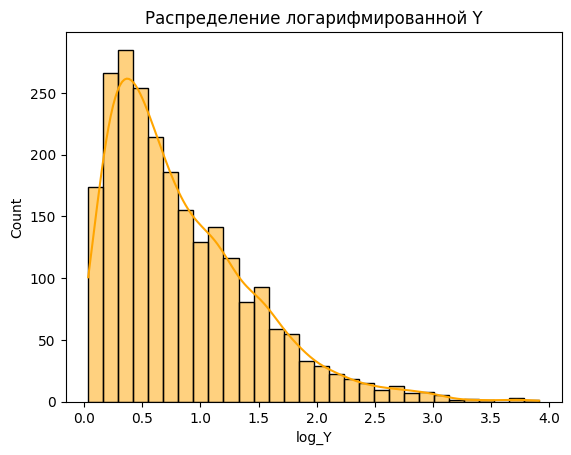

In [ ]:
# Логарифмирование Y (при наличии длинного хвоста)
train['log_Y'] = np.log1p(train['Y'])  # log(1 + Y)
sns.histplot(train['log_Y'], kde=True, bins=30, color='orange')
plt.title('Распределение логарифмированной Y')
plt.show()

**Выводы:**

1. Распределение целевой переменной имеет выраженный правый скошенный характер с длинным хвостом, тянущимся в область больших значений. Это может свидетельствовать о наличии значительных выбросов, которые могут существенно повлиять на обучение моделей.

2. На графике boxplot также видно большое количество выбросов, что подтверждает наличие экстремальных значений, которые могут искажать результаты. Важно учитывать, что такие выбросы могут быть как ошибками в данных, так и естественными аномальными значениями, отражающими особенности исследуемой области.

3. После применения логарифмирования распределение целевой переменной становится более сбалансированным и приближается к нормальному, что может улучшать в преспективе предсказуемость модели.

Однако для того чтобы принять решение о методах обработки выбросов, нам необходимо более глубоко понять их природу. Если выбросы являются артефактами данных, их следует удалить. В случае, когда выбросы представляют собой естественные, но редкие и важные значения, логарифмирование может быть более эффективным методом, чем их удаление, поскольку оно помогает уменьшить влияние экстремальных значений без потери полезной информации.

Таким образом, перед принятием решения важно провести детальное изучение природы выбросов целевой переменной, чтобы выбрать оптимальную стратегию их обработки

In [4]:
# Вычисляем границы выбросов (IQR)
Q1 = train['Y'].quantile(0.25)
Q3 = train['Y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#  Выделяем выбросы
outliers = train[(train['Y'] < lower_bound) | (train['Y'] > upper_bound)]
non_outliers = train[(train['Y'] >= lower_bound) & (train['Y'] <= upper_bound)]

print(f"Количество выбросов: {len(outliers)}")
print(f"Процент выбросов от общего числа данных: {len(outliers) / len(train) * 100:.2f}%")


Количество выбросов: 200
Процент выбросов от общего числа данных: 8.42%


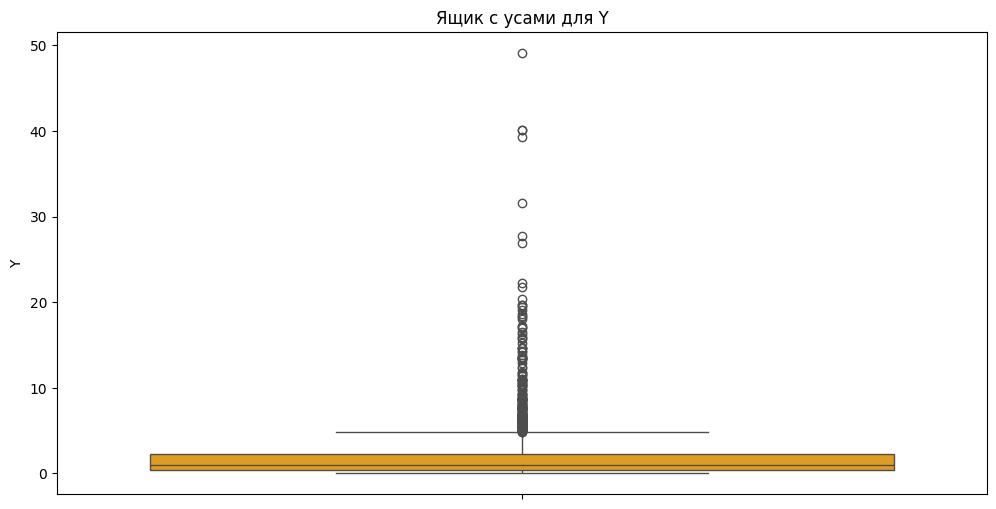

In [ ]:
# Визуализируем выбросы
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, y='Y', color='orange')
plt.title('Ящик с усами для Y')
plt.show()

In [5]:
# Выделение выбросов и основной части
outliers = train[(train['Y'] < lower_bound) | (train['Y'] > upper_bound)]
non_outliers = train[(train['Y'] >= lower_bound) & (train['Y'] <= upper_bound)]

# Описательная статистика
print("Характеристики основной части данных:")
print(non_outliers.describe())

print("\nХарактеристики выбросов:")
print(outliers.describe())



Характеристики основной части данных:
                 Y           X1           X2           X3           X4  \
count  2175.000000  2175.000000  2175.000000  2175.000000  2175.000000   
mean      1.252014     0.308751    -1.243253    -1.733115     0.021213   
std       1.118428     9.218170    31.507384    20.625985    18.003819   
min       0.034963   -32.750508  -112.821002   -76.372344   -59.385102   
25%       0.408725    -5.897700   -21.652608   -15.106869   -11.873051   
50%       0.846074     0.402838    -1.009068    -1.618484    -0.331186   
75%       1.827471     6.561329    20.842936    12.855794    12.482926   
max       4.878995    30.678800   105.193338    65.633737    59.695998   

                X5           X6           X7           X8           X9  ...  \
count  2175.000000  2175.000000  2175.000000  2175.000000  2175.000000  ...   
mean     -0.235996    -0.199612     0.052747     0.637275    -1.509046  ...   
std       4.397633     4.834229     1.767896    24.113646 

In [ ]:
# Сравнение средних значений по основным признакам
feature_means = pd.DataFrame({
    "Основные данные": non_outliers.mean(),
    "Выбросы": outliers.mean()
})
feature_means["Разница"] = feature_means["Выбросы"] - feature_means["Основные данные"]
feature_means.sort_values("Разница", ascending=False).head(10)


,Основные данные,Выбросы,Разница
X113,-4.567425,38.505459,43.072884
X54,-2.989323,26.640204,29.629527
X77,-3.239537,24.309425,27.548962
X119,-1.406074,20.627700,22.033774
X95,-2.140251,19.406991,21.547241
X51,-1.617017,17.849665,19.466681
X3,-1.733115,16.296756,18.029871
X12,-1.962508,15.860461,17.822969
X21,-2.153881,15.544413,17.698295
X71,-1.074053,14.768039,15.842091


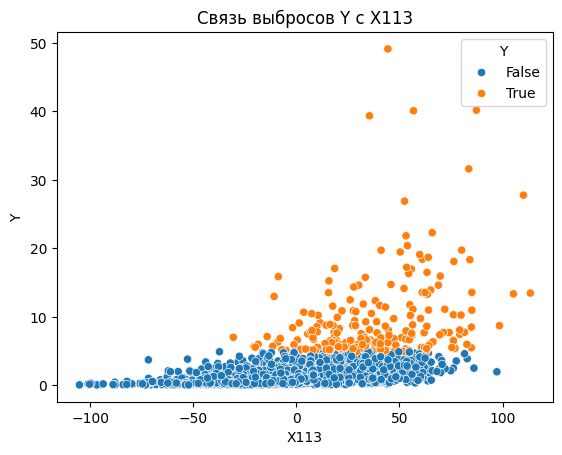

In [ ]:
# Пример визуализации выбросов для признаков X113
sns.scatterplot(data=train, x="X113", y="Y", hue=(train['Y'] > upper_bound))
plt.title("Связь выбросов Y с X113")
plt.show()


**Вывод:**

На основании проведенного анализа, можно сделать вывод, что выбросы представляют собой значения, значительно удаленные от основной массы данных, что указывает на возможные ошибки или шум в данных. Такие экстремальные значения, вероятно, искажают статистику и могут не нести полезной информации для анализа.





In [6]:
# Рассчитаем IQR для всех признаков
def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (df < lower_bound) | (df > upper_bound)

# Применим к обучающим данным
outliers = detect_outliers(train.drop(columns=['Y']))  # Исключаем целевую переменную

# Смотрим, сколько выбросов для каждого признака
outlier_counts = outliers.sum(axis=0)
print("Количество выбросов по признакам:")
print(outlier_counts)



Количество выбросов по признакам:
X1      13
X2      15
X3      19
X4      15
X5      21
        ..
X116     8
X117    14
X118    16
X119    14
X120    21
Length: 120, dtype: int64


In [7]:
# Удаление выбросов с помощью IQR
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df >= lower_bound) & (df <= upper_bound)]

# Применяем к данным
train_clean = train.copy()
for col in train.columns:
    if col != 'Y':
        train_clean = train_clean[(train_clean[col] >= train_clean[col].quantile(0.25) - 1.5 * (train_clean[col].quantile(0.75) - train_clean[col].quantile(0.25))) &
                                  (train_clean[col] <= train_clean[col].quantile(0.75) + 1.5 * (train_clean[col].quantile(0.75) - train_clean[col].quantile(0.25)))]


**Заключение:**

Мы провели анализ выбросов как целевой переменной, так и предикторов, и на основании полученных результатов можно предположить, что выбросы могут быть удалены. Однако стоит учитывать, что природа данных нам неизвестна, и такие выбросы могут быть результатом специфики исследуемой области. При построении модели мы учтем наличие этих выбросов и проверим, как они влияют на обучение, после чего примем обоснованное решение о дальнейшей обработке данных.

# **ML-модель**

In [8]:
# Удаление выбросов из обучающего набора данных
X_train = train_clean.drop(columns=['Y'])
y_train = train_clean['Y']

# Создаем объект StandardScaler
scaler = StandardScaler()

# Применяем стандартизацию к обучающему набору данных
X_train= scaler.fit_transform(X_train)

#  Использование тестовых данных без изменений
X_test = test.drop(columns=['Y'])
y_test = test['Y']
# Применяем стандартизацию к тестовому набору данных (используем тот же scaler)
X_test= scaler.transform(X_test)

In [9]:
# Инициализация модели с улучшенными параметрами
mlp_model = MLPRegressor(
    hidden_layer_sizes=(400, 150, 100),
    activation='relu',
    solver='adam',
    max_iter=2000,
    random_state=42,
    learning_rate_init=0.001,
    alpha=0.0005
)

# Обучение модели
mlp_model.fit(X_train, y_train)

# Прогнозирование
y_pred_mlp = mlp_model.predict(X_test)

# Оценка модели
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"R^2 на тестовых данных для MLP: {r2_mlp}")


R^2 на тестовых данных для MLP: 0.8317813191525146


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Создание кросс-валидатора
# Используем R^2 как метрику для оценки качества модели
r2_scorer = make_scorer(r2_score)

# Инициализация модели
mlp_model = MLPRegressor(
    hidden_layer_sizes=(400, 150, 100),
    activation='relu',
    solver='adam',
    max_iter=2000,
    random_state=42,
    learning_rate_init=0.001,
    alpha=0.0005
)

# Применение кросс-валидации с 5 фолдами
cv_scores = cross_val_score(mlp_model, X_train, y_train, cv=10, scoring=r2_scorer)

# Вывод результатов
print(f"Кросс-валидация (R^2) - Средний результат: {cv_scores.mean():.4f}")
print(f"Кросс-валидация (R^2) - Стандартное отклонение: {cv_scores.std():.4f}")

# Обучение модели на всей обучающей выборке
mlp_model.fit(X_train, y_train)

# Прогнозирование на тестовых данных
y_pred_mlp = mlp_model.predict(X_test)

# Оценка модели на тестовых данных
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f"R^2 на тестовых данных для MLP: {r2_mlp:.4f}")


Кросс-валидация (R^2) - Средний результат: 0.8891
Кросс-валидация (R^2) - Стандартное отклонение: 0.0399
R^2 на тестовых данных для MLP: 0.8074


Результаты кросс-валидации показывают высокий средний показатель
𝑅2— 0.8891, с относительно низким стандартным отклонением 0.0399, что подтверждает стабильность модели на различных подмножествах данных.

In [ ]:
# Сохранение модели в файл
joblib.dump(mlp_model, '/content/mlp_model.pkl')

['/content/mlp_model.pkl']

В файле представлена модель, которая продемонстрировала наилучший результат R² на тестовых данных. В отношении выбросов было принято решение удалить их, исходя из анализа их воздействия на качество модели.

# **DL-модель**

In [14]:
# Разделение обучающего набора на обучающий и валидационный
X_train, X_val, y_train, y_val = train_test_split(train_clean.drop(columns=['Y']), train_clean['Y'], test_size=0.2, random_state=42)

# Создаем объект StandardScaler
scaler = StandardScaler()

# Применяем стандартизацию к обучающему набору данных
X_train = scaler.fit_transform(X_train)

# Применяем стандартизацию к валидационному набору данных (используем тот же scaler)
X_val = scaler.transform(X_val)

# Использование тестовых данных без изменений
X_test = test.drop(columns=['Y'])
y_test = test['Y']

# Применяем стандартизацию к тестовому набору данных (используем тот же scaler)
X_test = scaler.transform(X_test)




In [11]:
# Улучшенная модель
dl_model = Sequential([
    Dense(512, input_shape=(X_train.shape[1],)),  # Увеличиваем количество нейронов в первом слое
    LeakyReLU(alpha=0.2),
    BatchNormalization(),  # Нормализация данных
    Dropout(0.3),  # Dropout для предотвращения переобучения

    Dense(256),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32),
    LeakyReLU(alpha=0.2),
    BatchNormalization(),

    Dense(1)  # Выходной слой
])




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
# Компиляция модели
optimizer = Adam(learning_rate=0.0001)
dl_model.compile(optimizer=optimizer, loss='mean_squared_error')

# Использование EarlyStopping для предотвращения переобучения
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Обучение модели
history = dl_model.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=32,
    validation_data=(X_val, y_val),  # Валидация на валидационном наборе
    callbacks=[early_stopping],  # Использование ранней остановки
    verbose=1
)


Epoch 1/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 1.0012 - val_loss: 0.5057
Epoch 2/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8949 - val_loss: 0.4913
Epoch 3/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.7555 - val_loss: 0.5036
Epoch 4/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.9080 - val_loss: 0.5248
Epoch 5/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6372 - val_loss: 0.5478
Epoch 6/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6899 - val_loss: 0.5240
Epoch 7/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8252 - val_loss: 0.5079
Epoch 8/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0414 - val_loss: 0.5126
Epoch 9/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1063 - val_loss: 0.5011
Epoch 10/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.7778 - val_loss: 0.5012
Epoch 11/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7237 - val_loss: 0.4741
Epoch 12/1000
28/28 ━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
# Прогнозирование
y_pred_dl = dl_model.predict(X_test)

# Оценка модели
r2_dl = r2_score(y_test, y_pred_dl)
print(f"R^2 на тестовых данных для  DL модели: {r2_dl}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
R^2 на тестовых данных для улучшенной DL модели: 0.8121069363967981


In [ ]:
# Сохранение модели в формате .keras
dl_model.save('/content/dl_model.keras')